### Heatmap from 6.10 Inspect Individual Days with dP

### Lon Lat Visualization

In [14]:
def is_NDJFM(month):
  return (month >= 11) | (month <= 3)

def time_mask(ds):
  return (is_NDJFM(ds['time.month']) & 
         (ds['time.year'] >= 2011) & # whole period. test is 2011.
         (ds['time.year'] <= 2019)) 

# just to generate results as the skeletion for saving saliency
gefs_file = 'data/gefs/WCUS/gefs_merged.nc' # didn't use shifted data
pr_gefs = xr.open_dataset(gefs_file)
pr_gefs = pr_gefs.sel(time=time_mask(pr_gefs))
results = pr_gefs.copy().drop('Total_precipitation').drop_dims('fhour').drop_dims('time')

############################################################################

## create lat coord
lat_coord = np.abs(np.linspace(14,62,49)-39)
lat_coord[28:] = lat_coord[28:]-2
lat_coord[25:28]=0.909
lat_coord = 1/lat_coord
    
## create lon coord
lon_coord = np.abs(np.linspace(219,263,45)-238)
lon_coord[21:]=lon_coord[21:]-1
lon_coord[19:22]=0.909
lon_coord = 1/lon_coord   

############################################################################
# # create lat coord
# lat_coord = np.linspace(14,62,49)-38
# lat_coord[29:] = lat_coord[29:]-4
# lat_coord[:24] = np.round(lat_coord[:24]/max(abs(lat_coord)),2) 
# lat_coord[29:] = np.round(lat_coord[29:]/max(abs(lat_coord)),2)
# lat_coord[24:29] = 0

# # create lon coord
# # 97 - 141
# # 263 - 219
# # 240 - 237
# lon_coord = np.linspace(219,263,45)-237
# lon_coord[22:]=lon_coord[22:]-3
# lon_coord[:18] = np.round(lon_coord[:18]/max(abs(lon_coord)),2)
# lon_coord[22:] = np.round(lon_coord[22:]/max(abs(lon_coord)),2)
# lon_coord[18:22] = 0
# lon_coord = -lon_coord


############################################################################
# # create lat coord
# lat_coord = np.linspace(14,62,49)-38
# lat_coord[29:] = lat_coord[29:]-4
# lat_coord[:24] = np.round(lat_coord[:24]/max(abs(lat_coord)),2)+1
# lat_coord[29:] = np.round(lat_coord[29:]/max(abs(lat_coord)),2)+1
# lat_coord[24:29] = 1

# # create lon coord
# # 97 - 141
# # 263 - 219
# # 240 - 237
# lon_coord = np.linspace(219,263,45)-237
# lon_coord[22:]=lon_coord[22:]-3
# lon_coord[:18] = np.round(lon_coord[:18]/max(abs(lon_coord)),2)-1
# lon_coord[22:] = np.round(lon_coord[22:]/max(abs(lon_coord)),2)-1
# lon_coord = -lon_coord
# lon_coord[18:22] = 1

# end result should be a rectangle matrix of the size 49*45
lat_coord = np.repeat(lat_coord,45).reshape(49,45)
lon_coord = np.transpose(np.repeat(lon_coord,49).reshape(45,49))

results['latitude'] = (['lat', 'lon'], lat_coord)
results['longitude'] = (['lat', 'lon'], lon_coord)

In [123]:
# # 97 - 141
# # 263 - 219
# # 240 - 237

# lon_coord = np.linspace(219,263,45)-237
# lon_coord[22:]=lon_coord[22:]-3
# lon_coord[:18] = np.round(lon_coord[:18]/max(abs(lon_coord)),2)
# lon_coord[22:] = np.round(lon_coord[22:]/max(abs(lon_coord)),2)
# lon_coord[18:22] = 0
# lon_coord = -lon_coord

# lat_coord = np.linspace(14,62,49)-38
# lat_coord[29:] = lat_coord[29:]-4
# lat_coord[:24] = np.round(lat_coord[:24]/max(abs(lat_coord)),2)
# lat_coord[29:] = np.round(lat_coord[29:]/max(abs(lat_coord)),2)
# lat_coord[24:29] = 0

# np.set_printoptions(suppress=True) 

# # np.stack([np.linspace(14,62,49),lat_coord])
# np.stack([np.linspace(219,263,45),lon_coord])

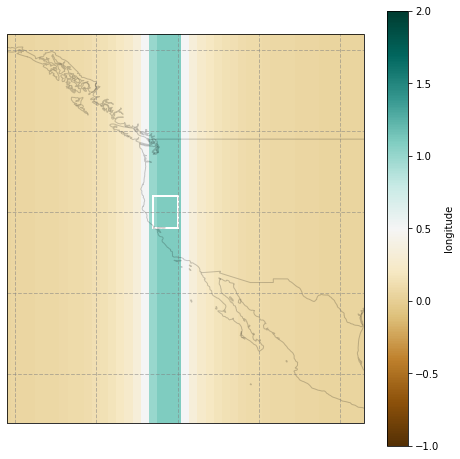

In [14]:
plt.rcParams['figure.figsize'] = [8, 8]

ax = map_format(plt.subplot(projection=geo))
results.longitude.plot(cmap='BrBG', vmax=2, vmin=-1)

ax.add_patch(mpatches.Rectangle(xy=[-123, 38], width=3, height=4,
                                edgecolor='white',
                                facecolor='none',
                                linewidth=2,
                                transform=ccrs.PlateCarree()))
plt.show()

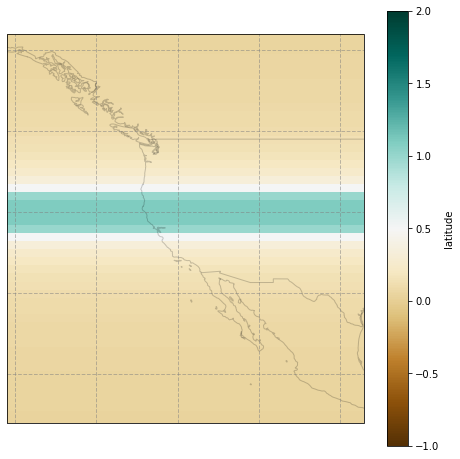

In [15]:
ax = map_format(plt.subplot(projection=geo))
results.latitude.plot(cmap='BrBG', vmax=2, vmin=-1)
plt.show()

In [19]:
import numpy as np 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import datetime as dt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

geo = ccrs.PlateCarree() # This line does not work within the function

def map_format(ax):
    # ax.add_feature(cartopy.feature.LAND, color='0.2')
    # ax.add_feature(cartopy.feature.OCEAN, color='steelblue')
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-',alpha=0.2)
    ax.add_feature(cartopy.feature.COASTLINE, linestyle='-',alpha=0.2)
#    ax.add_feature(cartopy.feature.STATES, linestyle='-')
    ax.set_extent([-141,-97,14,62], crs=geo)

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels  = False
    gl.right_labels  = False
    gl.bottom_labels  = False
    gl.left_labels  = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

### Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
con_precip_bm

,ERA5,GEFS_0_0.50_TP,GEFS_0_0.50_TN,GEFS_0_0.50_FP,GEFS_0_0.50_FN,GEFS_1_0.50_TP,GEFS_1_0.50_TN,GEFS_1_0.50_FP,GEFS_1_0.50_FN,GEFS_2_0.50_TP,...,GEFS_11_0.95_FP,GEFS_11_0.95_FN,GEFS_12_0.95_TP,GEFS_12_0.95_TN,GEFS_12_0.95_FP,GEFS_12_0.95_FN,GEFS_13_0.95_TP,GEFS_13_0.95_TN,GEFS_13_0.95_FP,GEFS_13_0.95_FN
1985-01-01,0.000184,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1985-01-02,0.000434,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1985-01-03,0.000059,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1985-01-04,0.000123,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1985-01-05,0.000900,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.000504,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-28,0.000050,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-29,0.187076,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2019-12-30,0.288100,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [28]:
# rname = 'results/benchmark_matrix_precip.csv'
# bm_matrix = pd.read_csv(rname, index_col=0, parse_dates=True)

# read benchmark train period
gefs = pd.read_csv('results/benchmark_matrix_precip_apples.csv', index_col=0, parse_dates=True)
GEFS9_0 = gefs['GEFS_0_0.90']

In [20]:
ERA5_9 = outcomes['ERA5_0.90']

In [21]:
CNN9_0 = (outcomes['CNN_0_0.90']> 0.5)

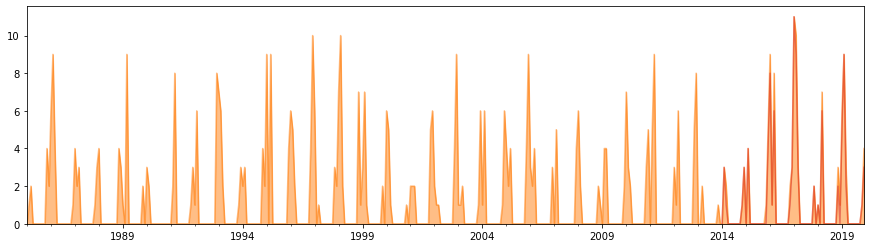

In [26]:
plt.rcParams['figure.figsize'] = [15, 4]

outcomes['ERA5_0.90'].resample('M').sum().plot.area(alpha=0.5, color='C1', label='ERA')
con_precip_bm.loc['2014-01-01':'2019-12-31', 'GEFS_0_0.90_TP'].resample('M').sum().plot(alpha = 0.5, color='C3', label='benchmark')

In [29]:
sum(ERA5_9), sum(CNN9_0), sum(GEFS9_0)

(530, 566, 530)

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 0,  True vs Pred Positive vs Benchmark Positive')

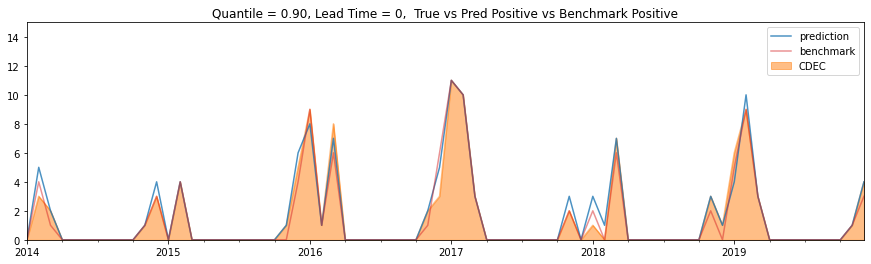

In [30]:
plt.rcParams['figure.figsize'] = [15, 4]
ERA5_9['2014-01-01':'2019-12-31'].resample('M').sum().plot.area(alpha=0.5, color='C1', label='CDEC')
CNN9_0['2014-01-01':'2019-12-31'].resample('M').sum().plot(alpha = 0.8, color='C0', label='prediction')
GEFS9_0['2014-01-01':'2019-12-31'].resample('M').sum().plot(alpha = 0.5, color='C3', label='benchmark')
plt.legend(loc=0)
plt.ylim([0,15])
plt.title('Quantile = 0.90, Lead Time = 0,  True vs Pred Positive vs Benchmark Positive')

In [33]:
CNN9_6 = (outcomes['CNN_6_0.90']> 0.5)
GEFS9_6 = gefs['GEFS_6_0.90']
sum(ERA5_9), sum(CNN9_6), sum(GEFS9_6)

(530, 841, 530)

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 6,  True vs Pred Positive vs Benchmark Positive')

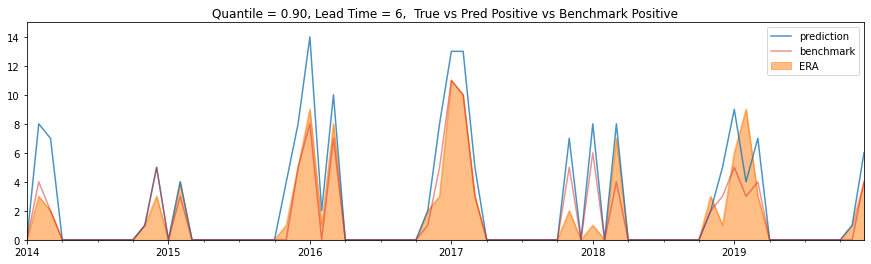

In [34]:
plt.rcParams['figure.figsize'] = [15, 4]
ERA5_9['2014-01-01':'2019-12-31'].resample('M').sum().plot.area(alpha=0.5, color='C1', label='ERA')
CNN9_6['2014-01-01':'2019-12-31'].resample('M').sum().plot(alpha = 0.8, color='C0', label='prediction')
GEFS9_6['2014-01-01':'2019-12-31'].resample('M').sum().plot(alpha = 0.5, color='C3', label='benchmark')
plt.legend(loc=0)
plt.ylim([0,15])
plt.title('Quantile = 0.90, Lead Time = 6,  True vs Pred Positive vs Benchmark Positive')

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 0, True vs Positive vs Benchmark')

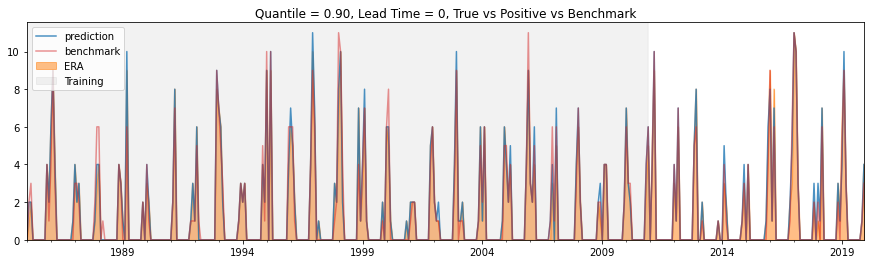

In [35]:
plt.rcParams['figure.figsize'] = [15, 4]
ERA5_9.resample('M').sum().plot.area(alpha=0.5, color='C1', label='ERA')
CNN9_0.resample('M').sum().plot(alpha = 0.8, color='C0', label='prediction')
GEFS9_0.resample('M').sum().plot(alpha = 0.5, color='C3', label='benchmark')

plt.fill_between(ERA5_9['1985-01-01':'2010-12-31'].index, 26, color='gray', alpha=0.1, label='Training')
plt.legend(loc='best')
plt.title('Quantile = 0.90, Lead Time = 0, True vs Positive vs Benchmark')

In [36]:
df = pd.concat([CNN9_0, (ERA5_9 & CNN9_0), (~ERA5_9 & ~CNN9_0), (~ERA5_9 & CNN9_0), (ERA5_9 & ~CNN9_0)], axis=1)
df = df.rename(columns={0:'TP', 1:'TN', 2:'FP', 3:'FN'})

In [37]:
df

,CNN_0_0.90,TP,TN,FP,FN
1985-01-01,False,False,True,False,False
1985-01-02,False,False,True,False,False
1985-01-03,False,False,True,False,False
1985-01-04,False,False,True,False,False
1985-01-05,False,False,True,False,False
...,...,...,...,...,...
2019-12-27,False,False,True,False,False
2019-12-28,False,False,True,False,False
2019-12-29,False,False,True,False,False
2019-12-30,False,False,True,False,False


Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 0, True Positive, False Positive, False Negative')

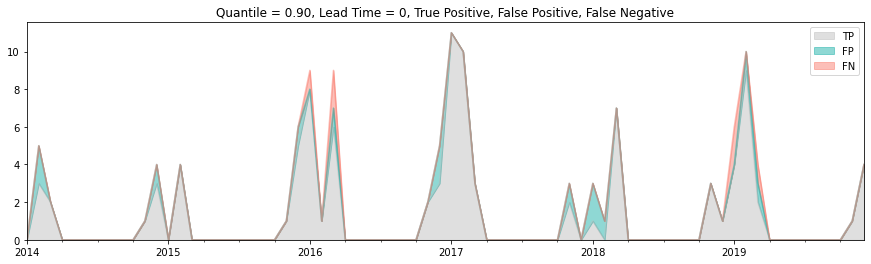

In [38]:
plt.rcParams['figure.figsize'] = [15, 4]
df_area = df['2014-01-01':'2019-12-31'].drop(columns=['CNN_0_0.90', 'TN'])
df_area.resample('M').sum().plot.area(alpha=0.5, color=['silver', 'lightseagreen', 'salmon'])
plt.legend(loc=0)
plt.title('Quantile = 0.90, Lead Time = 0, True Positive, False Positive, False Negative')

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 0, True Positive vs False Positive')

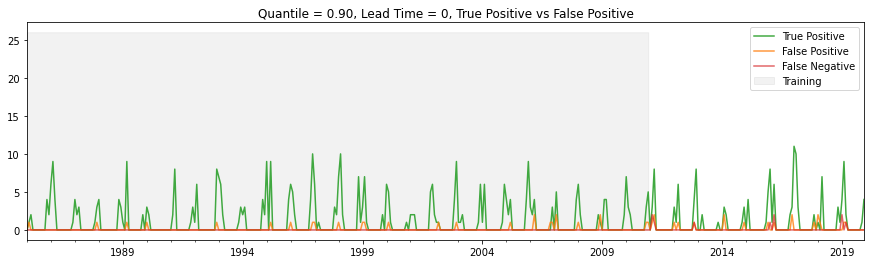

In [39]:
plt.rcParams['figure.figsize'] = [15, 4]
df['TP'].resample('M').sum().plot(alpha=0.9, color='C2', label='True Positive')
df['FP'].resample('M').sum().plot(alpha=0.8, color='C1', label='False Positive')
df['FN'].resample('M').sum().plot(alpha=0.7, color='C3', label='False Negative')
plt.fill_between(ERA5_9['1985-01-01':'2010-12-31'].index, 26, color='gray', alpha=0.1, label='Training')
plt.legend(loc=0)
plt.title('Quantile = 0.90, Lead Time = 0, True Positive vs False Positive')

In [40]:
df = pd.concat([CNN9_6, (ERA5_9 & CNN9_6), (~ERA5_9 & ~CNN9_6), (~ERA5_9 & CNN9_6), (ERA5_9 & ~CNN9_6)], axis=1)
df = df.rename(columns={0:'TP', 1:'TN', 2:'FP', 3:'FN'})

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 6, True Positive, False Positive, False Negative')

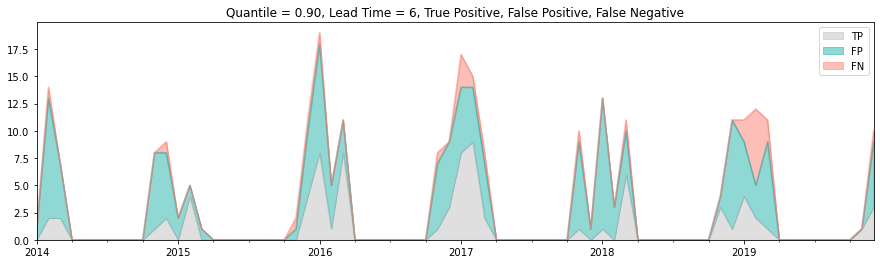

In [27]:
plt.rcParams['figure.figsize'] = [15, 4]
df_area = df['2014-01-01':'2019-12-31'].drop(columns=['CNN_6_0.90', 'TN'])
df_area.resample('M').sum().plot.area(alpha=0.5, color=['silver', 'lightseagreen', 'salmon'])
plt.legend(loc=0)
plt.title('Quantile = 0.90, Lead Time = 6, True Positive, False Positive, False Negative')

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 6, True Positive, False Positive, False Negative')

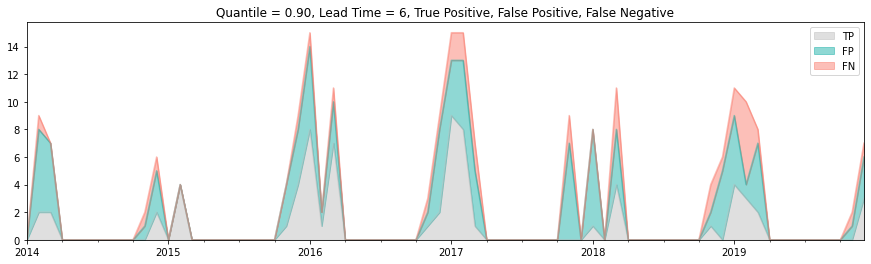

In [41]:
plt.rcParams['figure.figsize'] = [15, 4]
df_area = df['2014-01-01':'2019-12-31'].drop(columns=['CNN_6_0.90', 'TN'])
df_area.resample('M').sum().plot.area(alpha=0.5, color=['silver', 'lightseagreen', 'salmon'])
plt.legend(loc=0)
plt.title('Quantile = 0.90, Lead Time = 6, True Positive, False Positive, False Negative')

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 6, True Positive vs False Positive')

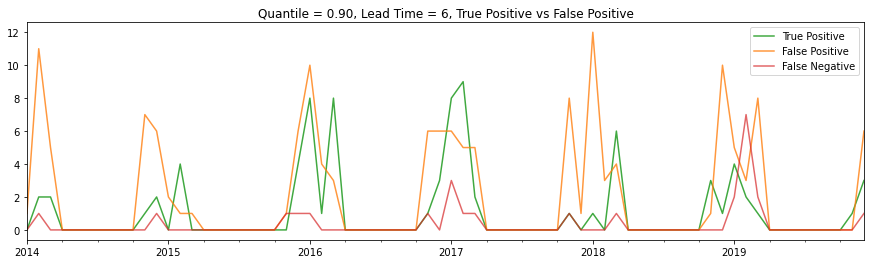

In [28]:
plt.rcParams['figure.figsize'] = [15, 4]
df_test = df['2014-01-01':'2019-12-31']
df_test['TP'].resample('M').sum().plot(alpha=0.9, color='C2', label='True Positive')
df_test['FP'].resample('M').sum().plot(alpha=0.8, color='C1', label='False Positive')
df_test['FN'].resample('M').sum().plot(alpha=0.7, color='C3', label='False Negative')
plt.legend(loc=0)
plt.title('Quantile = 0.90, Lead Time = 6, True Positive vs False Positive')

Text(0.5, 1.0, 'Quantile = 0.90, Lead Time = 6, True Positive vs False Positive')

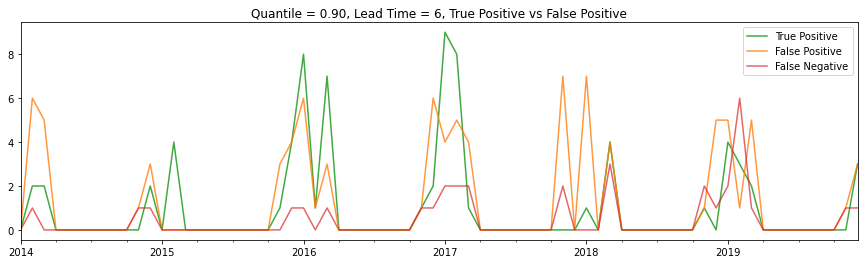

In [42]:
plt.rcParams['figure.figsize'] = [15, 4]
df_test = df['2014-01-01':'2019-12-31']
df_test['TP'].resample('M').sum().plot(alpha=0.9, color='C2', label='True Positive')
df_test['FP'].resample('M').sum().plot(alpha=0.8, color='C1', label='False Positive')
df_test['FN'].resample('M').sum().plot(alpha=0.7, color='C3', label='False Negative')
plt.legend(loc=0)
plt.title('Quantile = 0.90, Lead Time = 6, True Positive vs False Positive')

In [26]:
rname = 'results/benchmark_confusion_matrix_apples.csv'
con_precip_bm = pd.read_csv(rname, index_col=0, parse_dates=True)

In [29]:
key = '1d_precip_location_final1'
leads = [d for d in range(14)]
con_precip_vs = create_con_matrix_vs_benchmark(key)

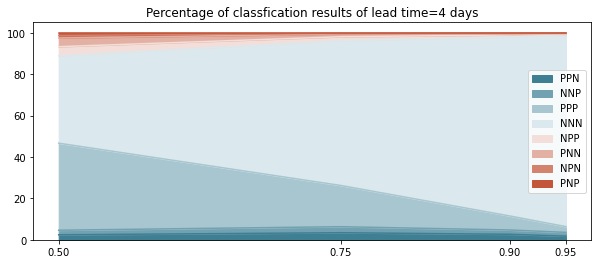

In [12]:
aggregate_lt(3)

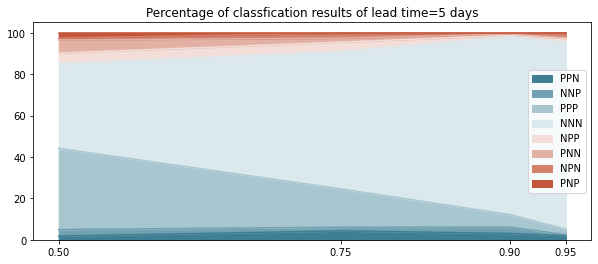

In [97]:
aggregate_lt(4)

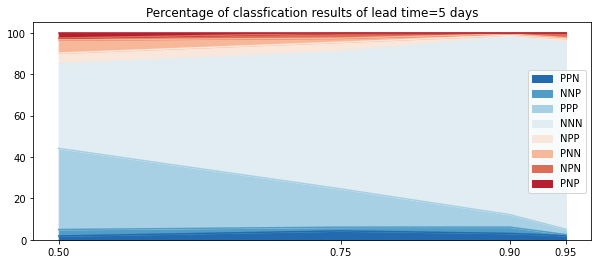

In [36]:
aggregate_lt(4)
plt.savefig('/final_figures/7_1.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/7_1.png')
plt.show()

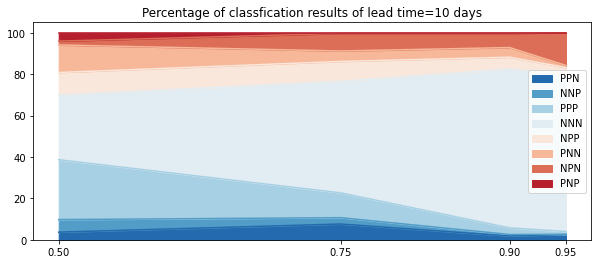

In [37]:
aggregate_lt(9)
plt.savefig('/final_figures/7_2.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/7_2.png')
plt.show()

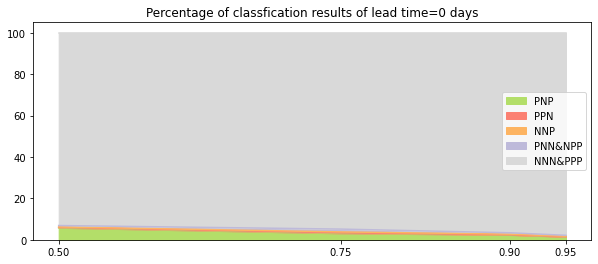

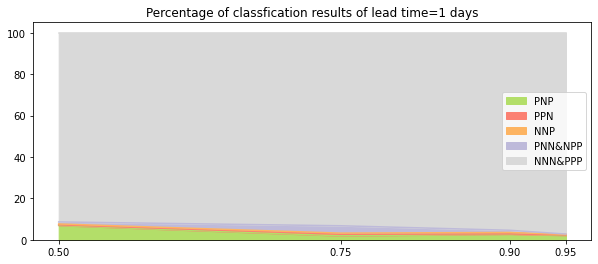

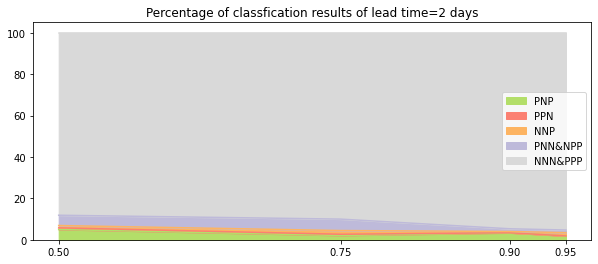

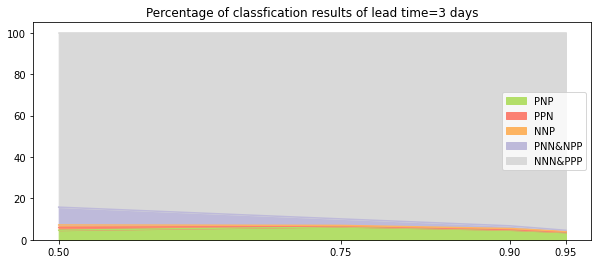

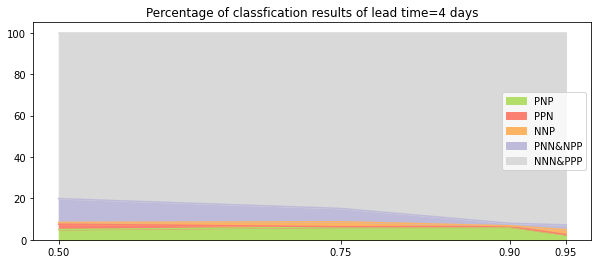

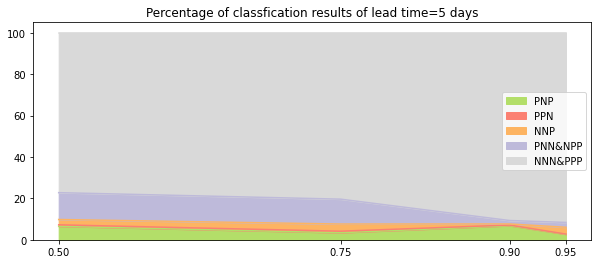

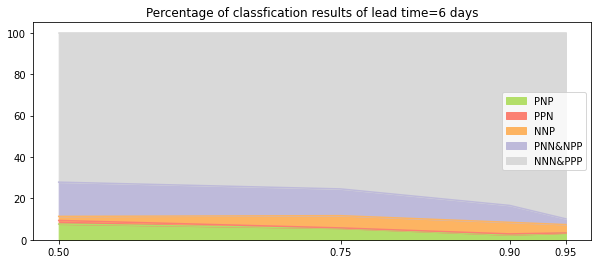

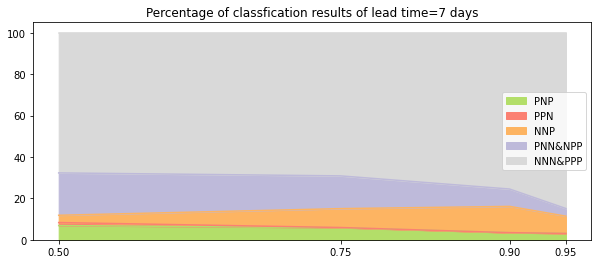

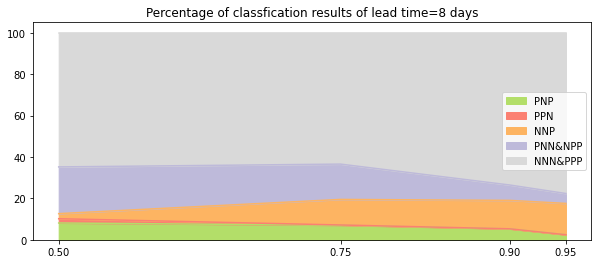

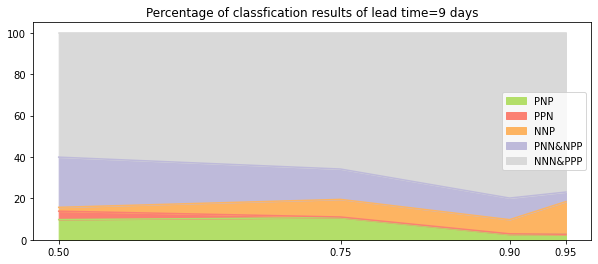

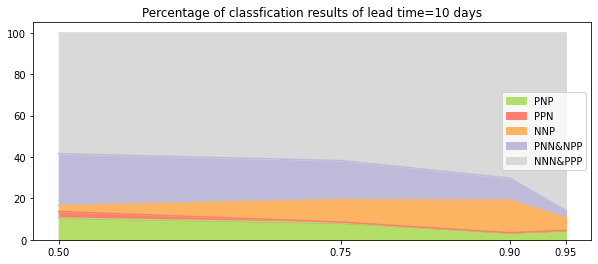

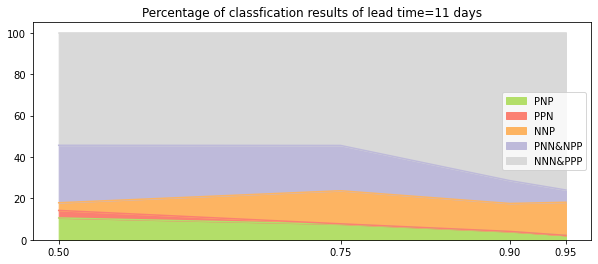

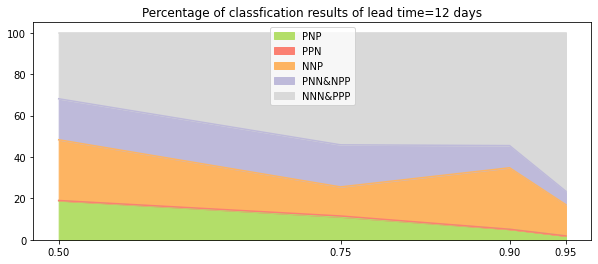

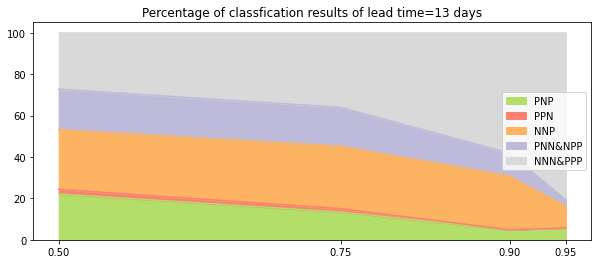

In [43]:
leads = [d for d in range(14)]
for l in leads:
    aggregate_lt(l)

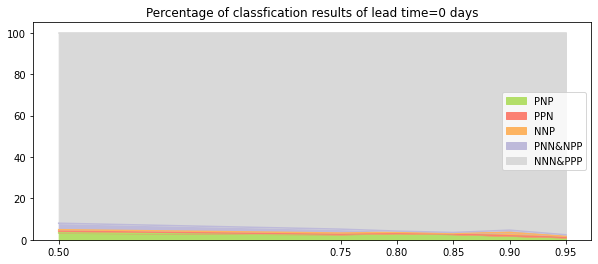

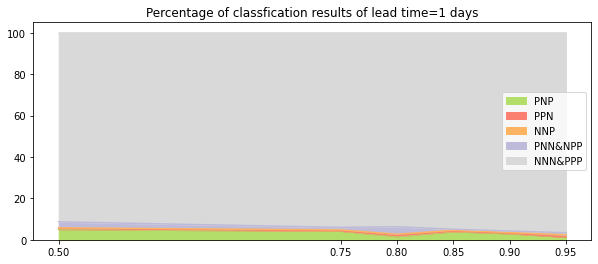

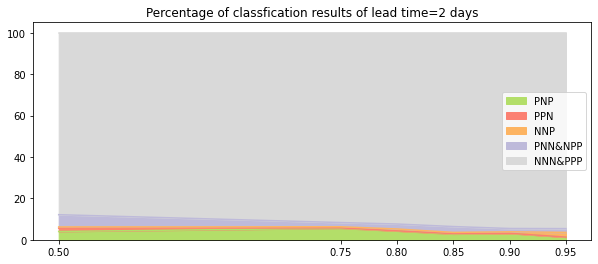

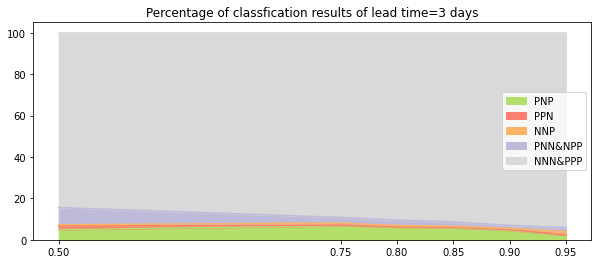

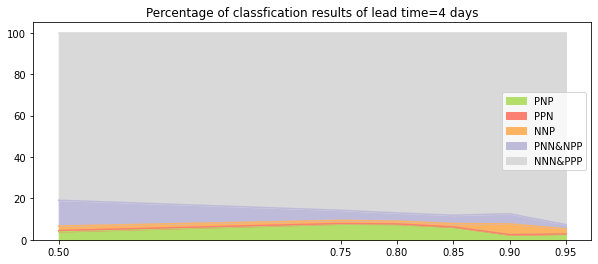

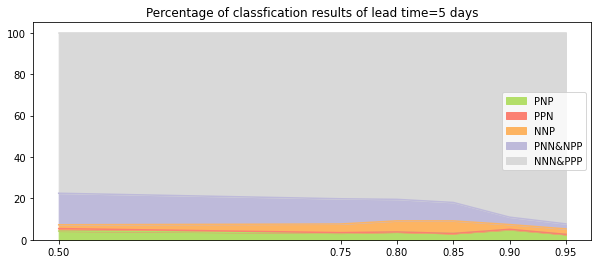

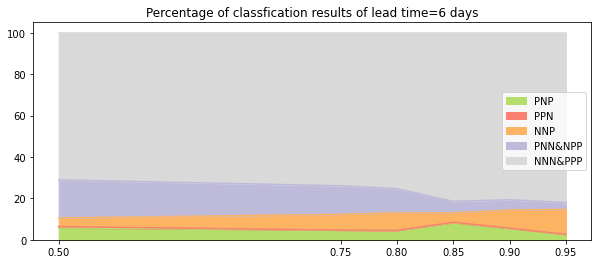

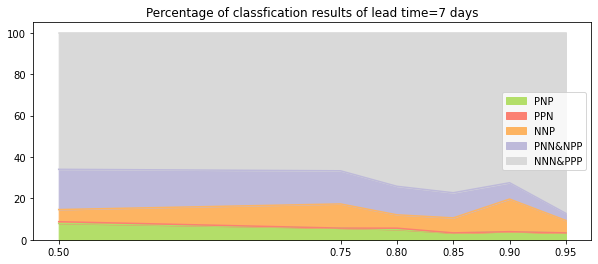

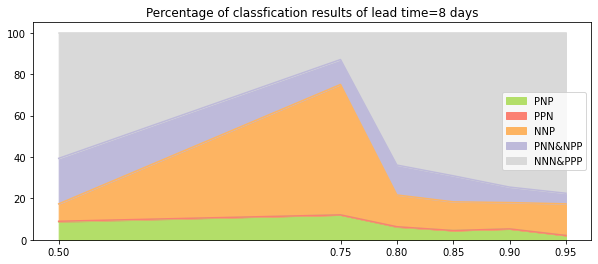

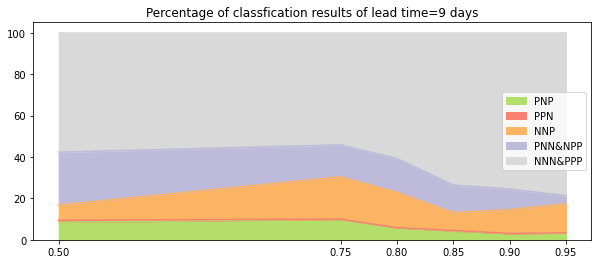

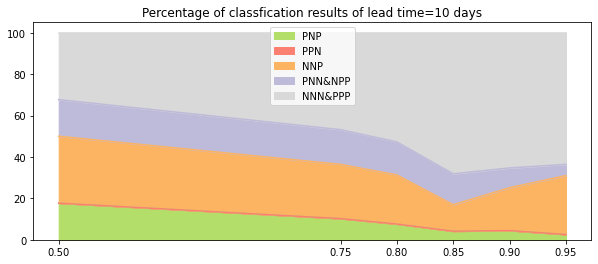

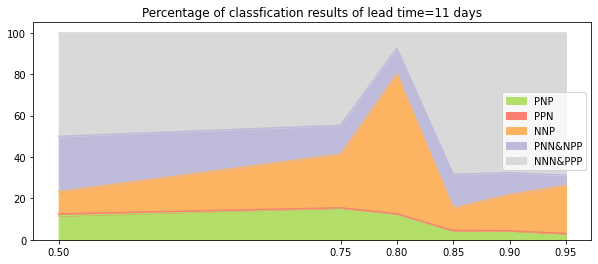

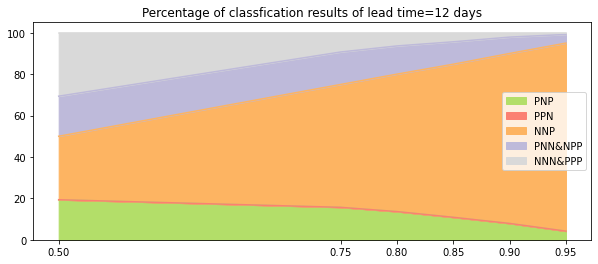

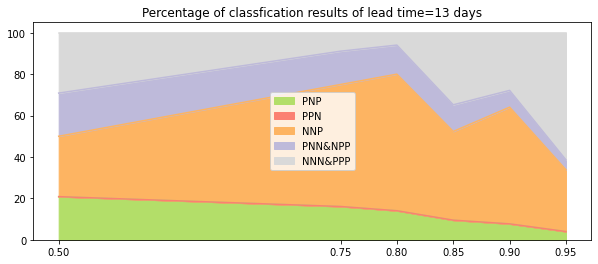

In [58]:
key = 'precip_location_std2'
con_precip_vs = create_con_matrix_vs_benchmark(key)
leads = [d for d in range(14)]
for l in leads:
    aggregate_lt(l)

### Threat Score

In [95]:
numbers = sum(con_outcomes_ana.drop(labels='ERA5', axis=1).values)
pos = 0
TS = {}

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]
models=['CNN','MLP']

for m in models:
    TS[m] = {}
    for q in quantiles:
        TS[m][q] = []
        for l in leads:
            TS[m][q].append(numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3]))
            #TS.loc['%s_%d_%0.2f' % (m, l, q), 0] = numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3])
            pos = pos + 4
        

In [123]:
con_outcomes_ana

,ERA5,CNN_0_0.50_TP,CNN_0_0.50_TN,CNN_0_0.50_FP,CNN_0_0.50_FN,CNN_1_0.50_TP,CNN_1_0.50_TN,CNN_1_0.50_FP,CNN_1_0.50_FN,CNN_2_0.50_TP,...,MLP_11_0.95_FP,MLP_11_0.95_FN,MLP_12_0.95_TP,MLP_12_0.95_TN,MLP_12_0.95_FP,MLP_12_0.95_FN,MLP_13_0.95_TP,MLP_13_0.95_TN,MLP_13_0.95_FP,MLP_13_0.95_FN
2011-01-01,0.620895,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-02,0.907760,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-03,0.032622,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-04,0.000501,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-05,0.000145,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.000504,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-28,0.000050,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-29,0.187076,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2019-12-30,0.288100,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [124]:
con_precip_bm[-1361:]

,ERA5,GEFS_0_0.50_TP,GEFS_0_0.50_TN,GEFS_0_0.50_FP,GEFS_0_0.50_FN,GEFS_1_0.50_TP,GEFS_1_0.50_TN,GEFS_1_0.50_FP,GEFS_1_0.50_FN,GEFS_2_0.50_TP,...,GEFS_11_0.95_FP,GEFS_11_0.95_FN,GEFS_12_0.95_TP,GEFS_12_0.95_TN,GEFS_12_0.95_FP,GEFS_12_0.95_FN,GEFS_13_0.95_TP,GEFS_13_0.95_TN,GEFS_13_0.95_FP,GEFS_13_0.95_FN
2011-01-01,0.620895,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-02,0.907760,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-03,0.032622,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-04,0.000501,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-05,0.000145,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.000504,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-28,0.000050,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-29,0.187076,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2019-12-30,0.288100,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [126]:
rname = 'results/benchmark_confusion_matrix_apples.csv'
con_precip_bm = pd.read_csv(rname, index_col=0, parse_dates=True)
# con_precip_bm

benchmark_cm = sum(con_precip_bm[-1361:].drop(labels='ERA5', axis=1).values)
pos = 0

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]
models= ['unbiased_bm']
# ['bm','unbiased_bm']

for m in models:
    TS[m] = {}
    for q in quantiles:
        TS[m][q] = []
        for l in leads:
            TS[m][q].append(benchmark_cm[pos]/(benchmark_cm[pos]+benchmark_cm[pos+2]+benchmark_cm[pos+3]))
            #TS.loc['%s_%d_%0.2f' % (m, l, q), 0] = numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3])
            pos = pos + 4

In [127]:
rname = 'results/benchmark_matrix_precip.csv'
outcomes_biased = pd.read_csv(rname, index_col=0, parse_dates=True)

leads = [d for d in range(14)]
#quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
quantiles = [0.50, 0.75, 0.9, 0.95]
points = pd.DataFrame(index=leads)
con_outcomes_biased = pd.DataFrame(outcomes_biased['ERA5']) #'ERA5'
for q in quantiles:
    for l in leads:
        label = outcomes_biased['ERA5_%0.2f' % q] #'ERA5'
        pred =  outcomes_biased['GEFS_%d_%0.2f' % (l, q)]
        TP = (label&pred)
        con_outcomes_biased['GEFS_%d_%0.2f_TP' % (l, q)] = TP
        TN = (~label&~pred)
        con_outcomes_biased['GEFS_%d_%0.2f_TN' % (l, q)] = TN
        FP = (~label&pred)
        con_outcomes_biased['GEFS_%d_%0.2f_FP' % (l, q)] = FP
        FN = (label&~pred)
        con_outcomes_biased['GEFS_%d_%0.2f_FN' % (l, q)] = FN

In [129]:
#con_outcomes_biased


benchmark_cm = sum(con_outcomes_biased[-1361:].drop(labels='ERA5', axis=1).values)
pos = 0

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]
models= ['bm']
# ['bm','unbiased_bm']

for m in models:
    TS[m] = {}
    for q in quantiles:
        TS[m][q] = []
        for l in leads:
            TS[m][q].append(benchmark_cm[pos]/(benchmark_cm[pos]+benchmark_cm[pos+2]+benchmark_cm[pos+3]))
            #TS.loc['%s_%d_%0.2f' % (m, l, q), 0] = numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3])
            pos = pos + 4

In [130]:
#TS = pd.DataFrame(index=outcomes_ana.columns[2:])
TS

{'CNN': {0.5: [0.9135618479880775,
   0.880057803468208,
   0.8629943502824858,
   0.8191933240611962,
   0.7469050894085282,
   0.7139303482587065,
   0.6561712846347607,
   0.6400966183574879,
   0.579136690647482,
   0.5235732009925558,
   0.5052264808362369,
   0.4718714121699196,
   0.4721189591078067,
   0.4615958240119314],
  0.75: [0.8803418803418803,
   0.8379888268156425,
   0.7593984962406015,
   0.7142857142857143,
   0.6328828828828829,
   0.5655021834061136,
   0.4770992366412214,
   0.454855195911414,
   0.3785488958990536,
   0.36195286195286197,
   0.34488188976377954,
   0.3036723163841808,
   0.2976878612716763,
   0.2652370203160271],
  0.9: [0.8209876543209876,
   0.711864406779661,
   0.6737967914438503,
   0.5736040609137056,
   0.5,
   0.4187192118226601,
   0.34701492537313433,
   0.2945945945945946,
   0.23325062034739455,
   0.2361111111111111,
   0.2240566037735849,
   0.2025974025974026,
   0.15870307167235495,
   0.141804788213628],
  0.95: [0.720430107526

### ROC

In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import h5py
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt

In [3]:
key = '1d_precip_location_final1'
rname = 'results/classifier_outcomes_%s.csv' % key
outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)
outcomes = outcomes[3932:]
outcomes.shape

(1361, 117)

In [17]:
outcomes.columns[50:]

Index(['MLP_9_0.75', 'CNN_10_0.75', 'MLP_10_0.75', 'CNN_11_0.75',
       'MLP_11_0.75', 'CNN_12_0.75', 'MLP_12_0.75', 'CNN_13_0.75',
       'MLP_13_0.75', 'ERA5_0.90', 'CNN_0_0.90', 'MLP_0_0.90', 'CNN_1_0.90',
       'MLP_1_0.90', 'CNN_2_0.90', 'MLP_2_0.90', 'CNN_3_0.90', 'MLP_3_0.90',
       'CNN_4_0.90', 'MLP_4_0.90', 'CNN_5_0.90', 'MLP_5_0.90', 'CNN_6_0.90',
       'MLP_6_0.90', 'CNN_7_0.90', 'MLP_7_0.90', 'CNN_8_0.90', 'MLP_8_0.90',
       'CNN_9_0.90', 'MLP_9_0.90', 'CNN_10_0.90', 'MLP_10_0.90', 'CNN_11_0.90',
       'MLP_11_0.90', 'CNN_12_0.90', 'MLP_12_0.90', 'CNN_13_0.90',
       'MLP_13_0.90', 'ERA5_0.95', 'CNN_0_0.95', 'MLP_0_0.95', 'CNN_1_0.95',
       'MLP_1_0.95', 'CNN_2_0.95', 'MLP_2_0.95', 'CNN_3_0.95', 'MLP_3_0.95',
       'CNN_4_0.95', 'MLP_4_0.95', 'CNN_5_0.95', 'MLP_5_0.95', 'CNN_6_0.95',
       'MLP_6_0.95', 'CNN_7_0.95', 'MLP_7_0.95', 'CNN_8_0.95', 'MLP_8_0.95',
       'CNN_9_0.95', 'MLP_9_0.95', 'CNN_10_0.95', 'MLP_10_0.95', 'CNN_11_0.95',
       'MLP_11_0.95', 'C

In [31]:
roc_q = 0.90
roc_m = 'CNN'

In [6]:
def roc_curve_prep(roc_q, roc_m):
    fpr, tpr = dict(), dict()
    precision, recall = dict(), dict()
    auc_score, f1 = dict(), dict()
    for i in range(14):
        fpr['%d' %i], tpr['%d' %i], _ = roc_curve(outcomes['ERA5_%.2f' %roc_q], outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)])
        precision['%d' %i], recall['%d' %i], _ = precision_recall_curve(outcomes['ERA5_%.2f' %roc_q], outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)])
        auc_score['%d' %i] = np.round(auc(fpr['%d' %i], tpr['%d' %i]),4)
        f1['%d' %i] = np.round(f1_score(outcomes['ERA5_%.2f' %roc_q], (outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)]> 0.5)),4)
    return fpr, tpr, precision, recall, auc_score, f1

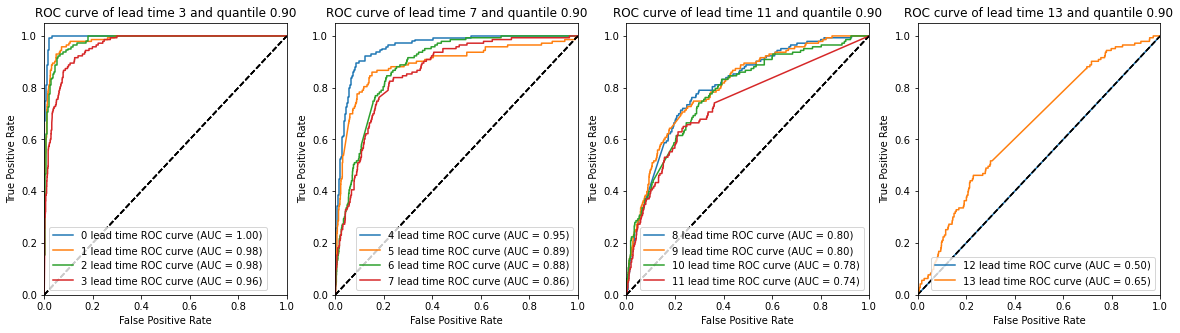

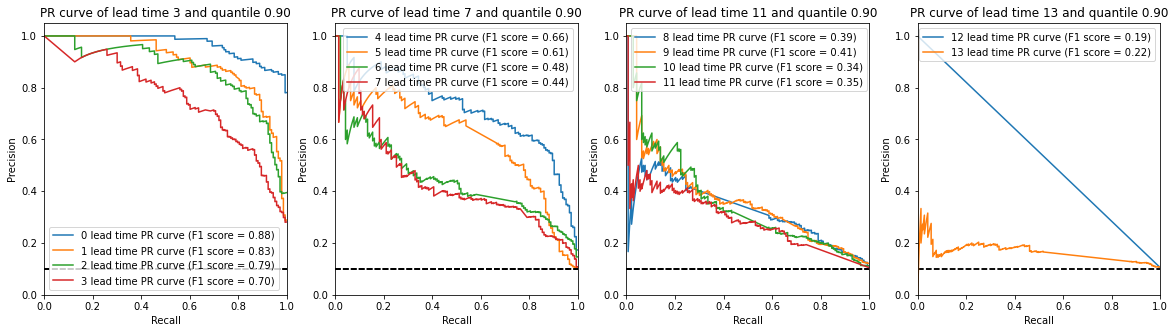

In [113]:
#location_std2 DONT Rerun!!!!!!!!!!!!!!!!!!11
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

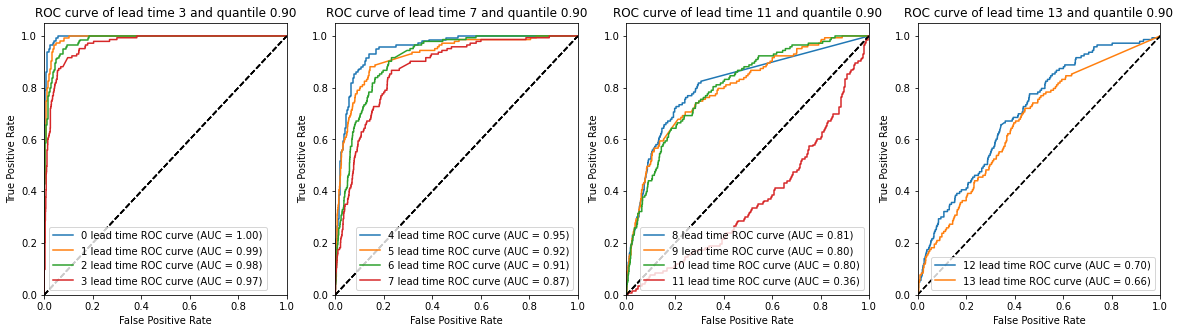

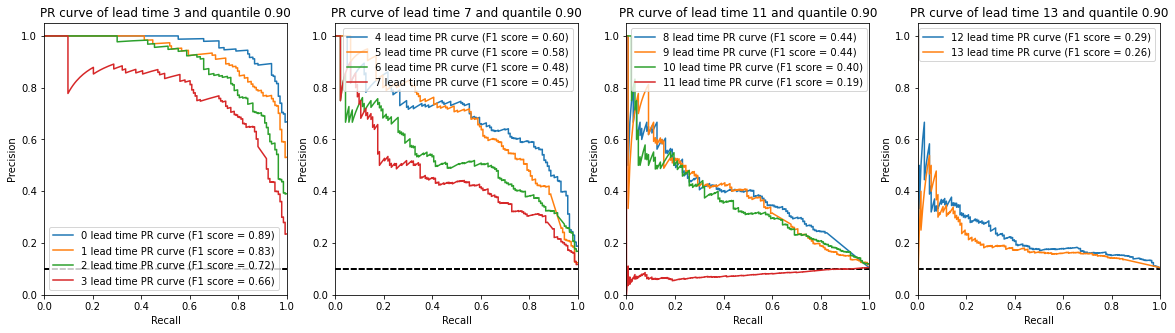

In [9]:
#location_nonstd3 DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

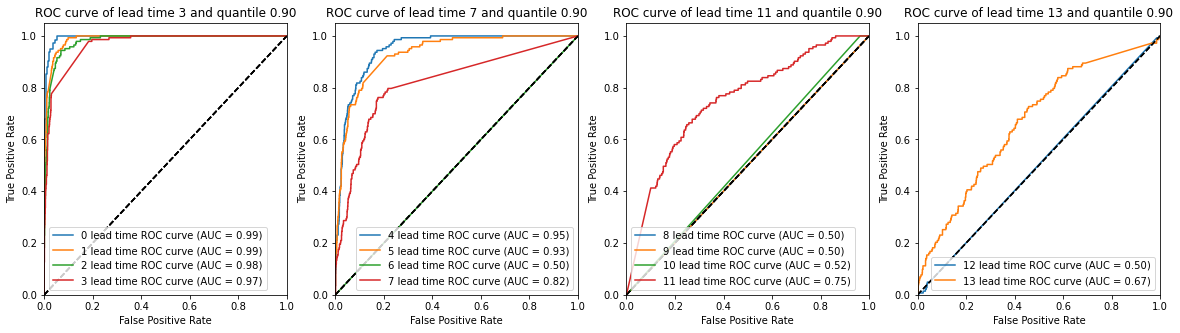

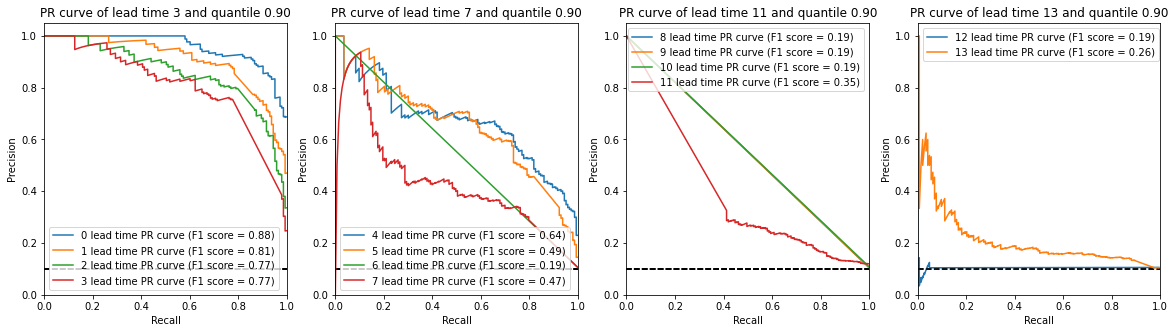

In [117]:
#location_v9 DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

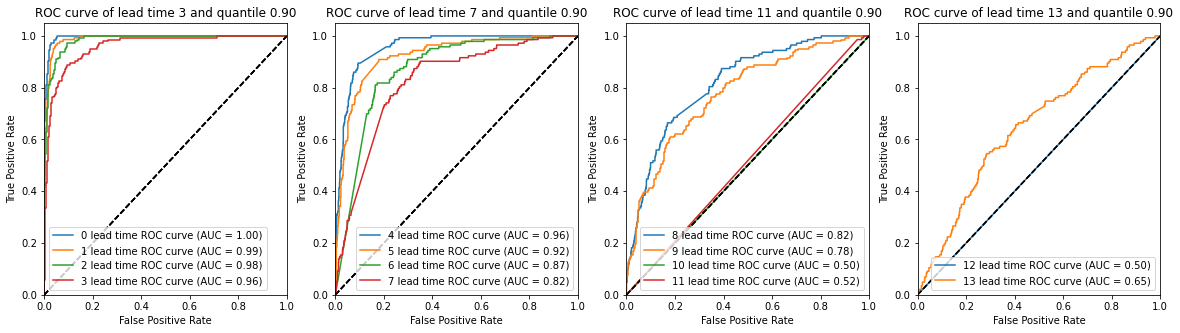

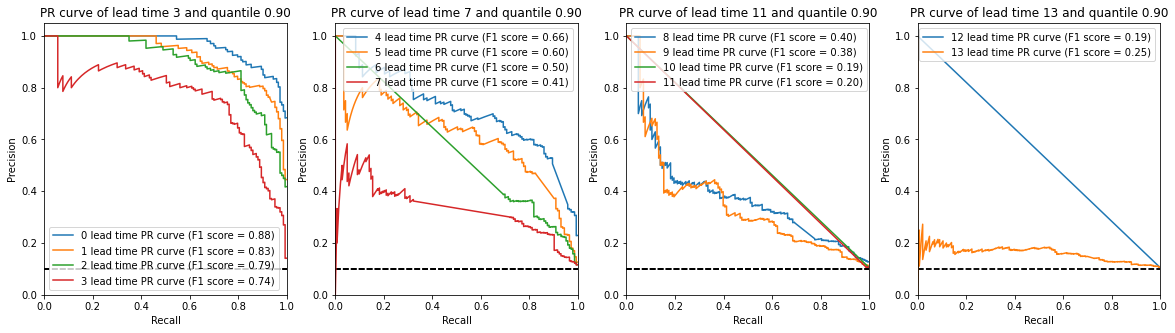

In [121]:
#location_v10 DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

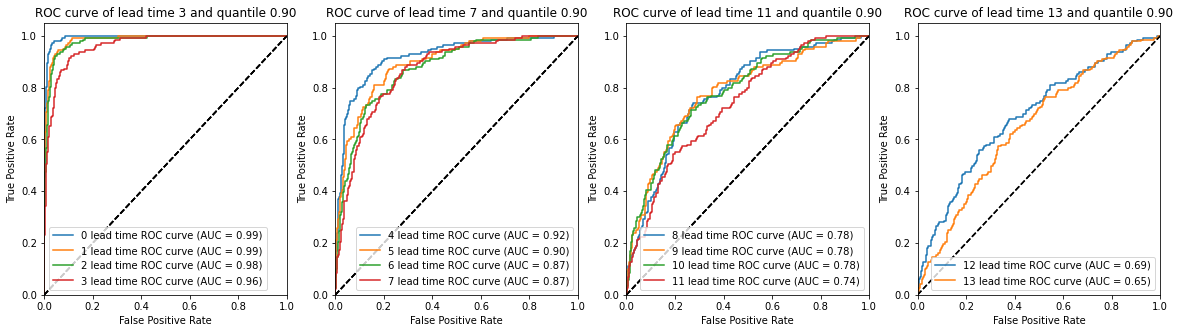

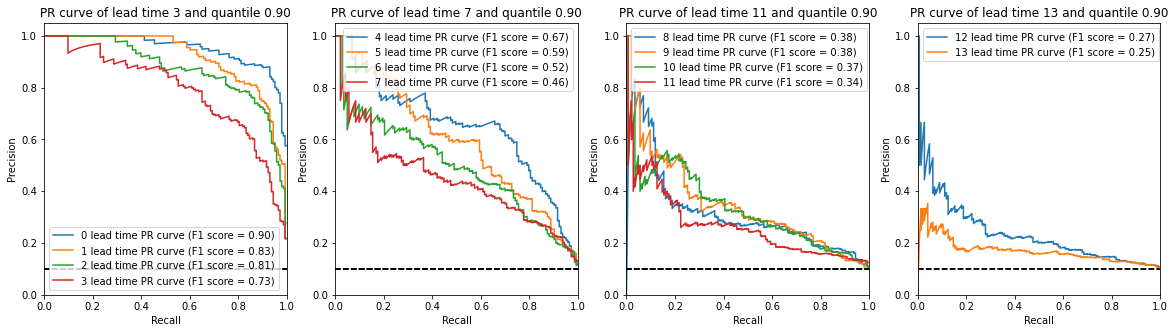

In [61]:
#newly picked final model DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

In [7]:
# benchmark confusion matrix
rname = 'results/benchmark_confusion_matrix_apples.csv'
con_precip_bm = pd.read_csv(rname, index_col=0, parse_dates=True)

In [32]:
# ROC matrix for benchmark at a certain Quantile
BM_dot = []
leads = [d for d in range(14)]
for l in leads:
    TP = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_TP' %(l, roc_q)).sum(axis=0))
    TN = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_TN' %(l, roc_q)).sum(axis=0))
    FP = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_FP' %(l, roc_q)).sum(axis=0))
    FN = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_FN' %(l, roc_q)).sum(axis=0))
    TPR = TP/(TP+FN)     # TP rate = TP/TP+FN
    FPR = FP/(FP+TN)     # FP rate = FP/FP+TN
    BM_dot.append([FPR,TPR])

In [18]:
# create confusion matrix for outcome matrix at all quantiles
# create ROC matrix for outcome as well - points
outcomes_ana = outcomes.copy() # here outcomes is for test period
for col in outcomes_ana.columns[1:]:
    if outcomes_ana[col].dtypes == 'float64':
        outcomes_ana[col] = (outcomes_ana[col]> 0.5)

leads = [d for d in range(14)]
#quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
quantiles = [0.50, 0.75, 0.9, 0.95]
points = pd.DataFrame(index=leads)
con_outcomes_ana = pd.DataFrame(outcomes_ana['ERA5']) #'ERA5'
models=['CNN','MLP']
for m in models:
    for q in quantiles:
        points['%s_%0.2f_TPR' % (m, q)] = leads
        points['%s_%0.2f_FPR' % (m, q)] = leads
        for l in leads:
            label = outcomes_ana['ERA5_%0.2f' % q] #'ERA5'
            pred =  outcomes_ana['%s_%d_%0.2f' % (m, l, q)]
            TP = (label&pred)
            con_outcomes_ana['%s_%d_%0.2f_TP' % (m, l, q)] = TP
            TN = (~label&~pred)
            con_outcomes_ana['%s_%d_%0.2f_TN' % (m, l, q)] = TN
            FP = (~label&pred)
            con_outcomes_ana['%s_%d_%0.2f_FP' % (m, l, q)] = FP
            FN = (label&~pred)
            con_outcomes_ana['%s_%d_%0.2f_FN' % (m, l, q)] = FN
            # TP rate = TP/TP+FN
            TPR = np.sum(TP)/(np.sum(TP)+np.sum(FN))
            # FP rate = FP/FP+TN
            FPR = np.sum(FP)/(np.sum(FP)+np.sum(TN))
            points.loc[l,'%s_%0.2f_TPR' % (m, q)] = TPR
            points.loc[l,'%s_%0.2f_FPR' % (m, q)] = FPR

In [103]:
#con_precip_vs
import seaborn as sns
quantiles = [0.50, 0.75, 0.9, 0.95]

def aggregate_lt(lt):
    Test_df = con_precip_vs.filter(regex='_%d_' %lt)
    Test_df.sum()
    a = np.reshape(Test_df.sum().values,(-1, 8))
    df_vs_quantile = pd.DataFrame(a, index=quantiles, columns=["PPN", "NNP", "PPP", "NNN", "NPP", "PNN", "NPN", "PNP"])                                                                          
#    df_vs_quantile
    plt.rcParams['figure.figsize'] = [10, 4]
#     color_id = [6, 3, 5, 2, 8] #green #red #orange #purple #grey
#     # gray unchanged correct prediction
#     # green changed to correct prediction 
#     # red changed to incorrect prediction because of FN
#     # purple stayed as incorrect prediction
#     # orange changed to incorrect prediction because of FP
#     qualitative_colors = sns.color_palette("Set3", 9)
#     qualitative_colors = [qualitative_colors[i] for i in color_id]
    df_vs_quantile = df_vs_quantile.divide(df_vs_quantile.sum(axis=1), axis=0)*100

    df_vs_quantile.plot.area(color=diverging_colors, title="Percentage of classfication results of lead time=%d days" %(lt+1))
    plt.xticks(df_vs_quantile.index)

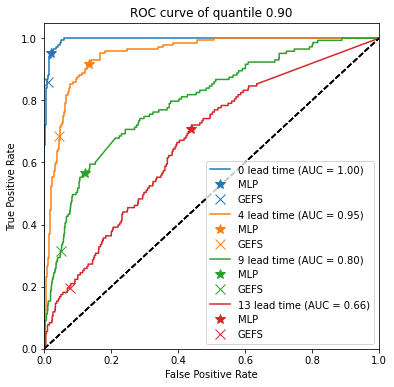

In [29]:
# Dont rerun for location v10!!!!!!!!!!!!!!!!!!!!!!!
# this was test period results
lts = [0,4,9,13]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i], label='%s' %roc_m)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], "x", markersize=10, color=colors[i], label='GEFS')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of quantile %0.2f' % roc_q)
    plt.legend(loc="best")
plt.savefig('/final_figures/5.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/5.png')
plt.show()

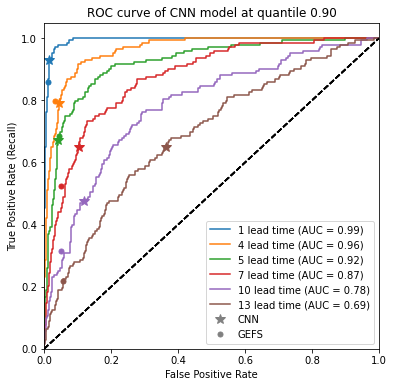

In [34]:
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

lts = [0,3,4,6,9,12]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4', 'C5']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='%s' %roc_m)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i]) #, label='GEFS')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve of %s model at quantile %0.2f' % (roc_m, roc_q))
plt.legend(loc="best")
plt.savefig('/final_figures/5_1.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/5_1.png')
plt.show()

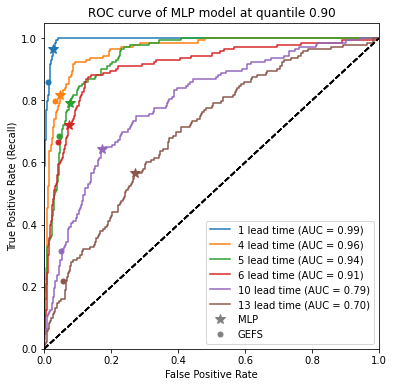

In [35]:
roc_q = 0.90
roc_m = 'MLP'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

lts = [0,3,4,5,9,12]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4', 'C5']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='%s' %roc_m)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i]) #, label='GEFS')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve of %s model at quantile %0.2f' % (roc_m, roc_q))
plt.legend(loc="best")
plt.savefig('/final_figures/5_2.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/5_2.png')
plt.show()

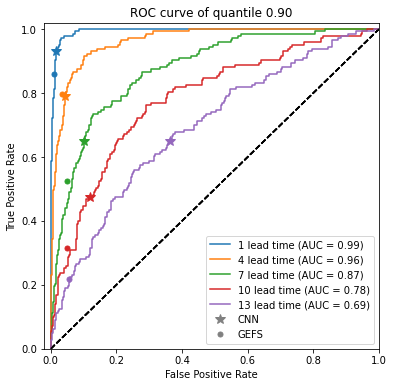

In [104]:
# Dont rerun for newly tuned final models!!!!!!!!!!!!!!!!!!!!!!!

lts = [0,3,6,9,12]

roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='CNN')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i])#, label='GEFS')

    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])

plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of quantile %0.2f' % roc_q)
plt.legend(loc="best")

plt.savefig('/final_figures/7.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/7.png')
plt.show()

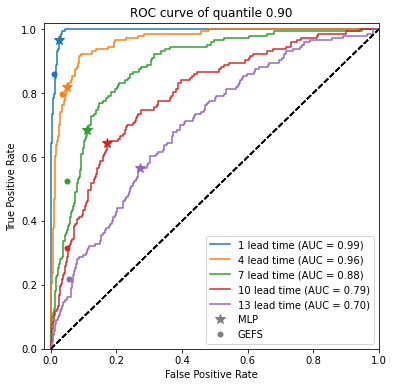

In [103]:
# Dont rerun for newly tuned final models!!!!!!!!!!!!!!!!!!!!!!!
roc_m = 'MLP'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

lts = [0,3,6,9,12]#,5,6,7,8,9,10,11,12,13]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='CNN')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i])#, label='GEFS')

    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])

plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of quantile %0.2f' % roc_q)
plt.legend(loc="best")

plt.savefig('/final_figures/7.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/7.png')
plt.show()

---
### Functions

### 原版

In [2]:
# def create_con_matrix_vs_benchmark(key):
#     rname = 'results/classifier_outcomes_%s.csv' % key
#     outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)
#     binary_outcomes = outcomes.copy()
#     for col in outcomes.columns[1:]:
#         if outcomes[col].dtypes == 'float64':
#             binary_outcomes[col] = (outcomes[col]> 0.5)


#     con_precip_vs = pd.DataFrame(gefs['ERA5']) #'ERA5'

#     for q in quantiles:
#         for l in leads:
#             label = gefs['ERA5_%0.2f' % q] #'ERA5'
#             bm_pred =  gefs['GEFS_%d_%0.2f' % (l, q)]
#             m_pred = pred =  binary_outcomes['CNN_%d_%0.2f' % (l, q)] # this draws from stored variable - binary_outcomes 
#             con_precip_vs['VS_%d_%0.2f_PNP' % (l, q)] = (label&m_pred&~bm_pred | ~label&~m_pred&bm_pred) # corrected wrong bm_pred
#             con_precip_vs['VS_%d_%0.2f_PPN' % (l, q)] = (label&~m_pred&bm_pred ) # changed good bm_pred to incorrect because of FN
#             con_precip_vs['VS_%d_%0.2f_NNP' % (l, q)] = (~label&m_pred&~bm_pred) # change good bm_pred to incorrect because of FP
#             con_precip_vs['VS_%d_%0.2f_PNN&NPP' % (l, q)] = (label&~m_pred&~bm_pred | ~label&m_pred&bm_pred) # unchanged bad pred
#             con_precip_vs['VS_%d_%0.2f_NNN&PPP' % (l, q)] = (label&m_pred&bm_pred | ~label&~m_pred&~bm_pred) # good as always
            
#     return con_precip_vs

In [3]:
# #con_precip_vs
# import seaborn as sns
# quantiles = [0.50, 0.75, 0.9, 0.95]

# def aggregate_lt(lt):
#     Test_df = con_precip_vs.filter(regex='_%d_' %lt)
#     Test_df.sum()
#     a = np.reshape(Test_df.sum().values,(-1, 5))
#     df_vs_quantile = pd.DataFrame(a, index=quantiles, columns=["PNP", "PPN", "NNP", "PNN&NPP", "NNN&PPP"])                                                                          
#     df_vs_quantile
#     plt.rcParams['figure.figsize'] = [10, 4]
#     color_id = [6, 3, 5, 2, 8] #green #red #orange #purple #grey
#     # gray unchanged correct prediction
#     # green changed to correct prediction 
#     # red changed to incorrect prediction because of FN
#     # purple stayed as incorrect prediction
#     # orange changed to incorrect prediction because of FP
#     qualitative_colors = sns.color_palette("Set3", 9)
#     qualitative_colors = [qualitative_colors[i] for i in color_id]
#     df_vs_quantile = df_vs_quantile.divide(df_vs_quantile.sum(axis=1), axis=0)*100

#     df_vs_quantile.plot.area(color=qualitative_colors, title="Percentage of classfication results of lead time=%d days" %lt)
#     plt.xticks(df_vs_quantile.index)
#     plt.show()

In [4]:
def create_con_matrix_vs_benchmark(key):
    rname = 'results/classifier_outcomes_%s.csv' % key
    outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)
    binary_outcomes = outcomes.copy()
    for col in outcomes.columns[1:]:
        if outcomes[col].dtypes == 'float64':
            binary_outcomes[col] = (outcomes[col]> 0.5)


    con_precip_vs = pd.DataFrame(gefs['ERA5']) #'ERA5'

    for q in quantiles:
        for l in leads:
            label = gefs['ERA5_%0.2f' % q] #'ERA5'
            bm_pred =  gefs['GEFS_%d_%0.2f' % (l, q)]
            m_pred = pred =  binary_outcomes['CNN_%d_%0.2f' % (l, q)] # this draws from stored variable - binary_outcomes 
            con_precip_vs['VS_%d_%0.2f_PPN' % (l, q)] = (label&m_pred&~bm_pred) # corrected wrong bm_pred
            con_precip_vs['VS_%d_%0.2f_NNP' % (l, q)] = (~label&~m_pred&bm_pred)
            con_precip_vs['VS_%d_%0.2f_PPP' % (l, q)] = (label&m_pred&bm_pred) # good as always
            con_precip_vs['VS_%d_%0.2f_NNN' % (l, q)] = (~label&~m_pred&~bm_pred) # good as always
            con_precip_vs['VS_%d_%0.2f_NPP' % (l, q)] = (~label&m_pred&bm_pred) # unchanged bad pred
            con_precip_vs['VS_%d_%0.2f_PNN' % (l, q)] = (label&~m_pred&~bm_pred) # unchanged bad pred
            con_precip_vs['VS_%d_%0.2f_NPN' % (l, q)] = (~label&m_pred&~bm_pred) # change good bm_pred to incorrect because of FP
            con_precip_vs['VS_%d_%0.2f_PNP' % (l, q)] = (label&~m_pred&bm_pred) # changed good bm_pred to incorrect because of FN
             
    return con_precip_vs

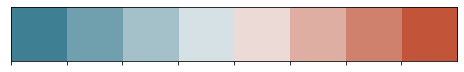

In [9]:
# find colors

#diverging_colors = sns.color_palette("coolwarm", 8)

diverging_colors =  sns.diverging_palette(220, 20, n=8)
sns.palplot(sns.diverging_palette(220, 20, n=8))

# sns.palplot(diverging_colors)

# PPN NNP PPP NNN NPP PNN NPN PNP
diverging_colors = sns.color_palette("RdBu_r", 8)


In [33]:
#con_precip_vs
import seaborn as sns
quantiles = [0.50, 0.75, 0.9, 0.95]

def aggregate_lt(lt):
    Test_df = con_precip_vs.filter(regex='_%d_' %lt)
    Test_df.sum()
    a = np.reshape(Test_df.sum().values,(-1, 8))
    df_vs_quantile = pd.DataFrame(a, index=quantiles, columns=["PPN", "NNP", "PPP", "NNN", "NPP", "PNN", "NPN", "PNP"])                                                                          
#    df_vs_quantile
    plt.rcParams['figure.figsize'] = [10, 4]
#     color_id = [6, 3, 5, 2, 8] #green #red #orange #purple #grey
#     # gray unchanged correct prediction
#     # green changed to correct prediction 
#     # red changed to incorrect prediction because of FN
#     # purple stayed as incorrect prediction
#     # orange changed to incorrect prediction because of FP
#     qualitative_colors = sns.color_palette("Set3", 9)
#     qualitative_colors = [qualitative_colors[i] for i in color_id]
    df_vs_quantile = df_vs_quantile.divide(df_vs_quantile.sum(axis=1), axis=0)*100

    df_vs_quantile.plot.area(color=diverging_colors, title="Percentage of classfication results of lead time=%d days" %(lt+1))
    plt.xticks(df_vs_quantile.index)

In [7]:
#con_precip_vs
import seaborn as sns
quantiles = [0.50, 0.75, 0.9, 0.95]

def aggregate_lt_2017(lt):
    Test_df = con_precip_vs["2016-11-01":"2017-3-31"].filter(regex='_%d_' %lt)
    Test_df.sum()
    a = np.reshape(Test_df.sum().values,(-1, 8))
    df_vs_quantile = pd.DataFrame(a, index=quantiles, columns=["PPN", "NNP", "PPP", "NNN", "NPP", "PNN", "NPN", "PNP"])                                                                          
#    df_vs_quantile
    plt.rcParams['figure.figsize'] = [10, 4]
#     color_id = [6, 3, 5, 2, 8] #green #red #orange #purple #grey
#     # gray unchanged correct prediction
#     # green changed to correct prediction 
#     # red changed to incorrect prediction because of FN
#     # purple stayed as incorrect prediction
#     # orange changed to incorrect prediction because of FP
#     qualitative_colors = sns.color_palette("Set3", 9)
#     qualitative_colors = [qualitative_colors[i] for i in color_id]
    df_vs_quantile = df_vs_quantile.divide(df_vs_quantile.sum(axis=1), axis=0)*100

    df_vs_quantile.plot.area(color=diverging_colors, title="Percentage of classfication results of lead time=%d days" %(lt+1))
    plt.xticks(df_vs_quantile.index)
    plt.show()

In [8]:
def roc_plot(roc_q):
    # this was test period results

    import warnings
    warnings.filterwarnings('ignore')

    plt.rcParams['figure.figsize'] = [20, 5]

    for i in range(14):
        plt.subplot(1,4,i//4+1)
        plt.plot(fpr['%d' %i], tpr['%d' %i], label='%d lead time ROC curve (AUC = %0.2f)' %(i, auc_score['%d' %i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve of lead time %d and quantile %0.2f' %(i, roc_q))
        plt.legend(loc="best")
    plt.show()

    for i in range(14):
        plt.subplot(1,4,i//4+1)
        no_skill = 0.1
        plt.plot([0, 1], [no_skill, no_skill], 'k--')
        plt.plot(recall['%d' %i], precision['%d' %i], label='%d lead time PR curve (F1 score = %0.2f)' % (i, f1['%d' %i]))
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PR curve of lead time %d and quantile %0.2f' %(i, roc_q))
        plt.legend(loc="best")
    plt.show()